# Introduction

In this project, we will be exploring the [fraud_oracle.csv](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)dataset, which contains information on vehicle insurance claims and whether they are fraudulent or not. The aim of this project is to build a model to detect fraudulent claims based on the available data.

<h4>Data Exploration</h4>

We start by reading in the dataset and taking a look at its structure and summary statistics.

In [2]:
fraud <- read.csv("fraud_oracle.csv")

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
head(fraud)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,⋯,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
6,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,⋯,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [5]:
summary(fraud)

    Month            WeekOfMonth     DayOfWeek             Make          
 Length:15420       Min.   :1.000   Length:15420       Length:15420      
 Class :character   1st Qu.:2.000   Class :character   Class :character  
 Mode  :character   Median :3.000   Mode  :character   Mode  :character  
                    Mean   :2.789                                        
                    3rd Qu.:4.000                                        
                    Max.   :5.000                                        
 AccidentArea       DayOfWeekClaimed   MonthClaimed       WeekOfMonthClaimed
 Length:15420       Length:15420       Length:15420       Min.   :1.000     
 Class :character   Class :character   Class :character   1st Qu.:2.000     
 Mode  :character   Mode  :character   Mode  :character   Median :3.000     
                                                          Mean   :2.694     
                                                          3rd Qu.:4.000     
                    

In [6]:
dim(fraud)

[1] 15420    33

The dataset contains 33 columns and 15420 rows.

In [80]:
# View unique values for each column
lapply(fraud, unique)

$Month
 [1] 12  1 10  6  2 11  4  3  8  7  5  9

$WeekOfMonth
[1] 5 3 2 4 1

$DayOfWeek
[1] 3 5 6 1 2 7 4

$Make
 [1] "Honda"     "Toyota"    "Ford"      "Mazda"     "Chevrolet" "Pontiac"  
 [7] "Accura"    "Dodge"     "Mercury"   "Jaguar"    "Nisson"    "VW"       
[13] "Saab"      "Saturn"    "Porche"    "BMW"       "Mecedes"   "Ferrari"  
[19] "Lexus"    

$AccidentArea
[1] "Urban" "Rural"

$DayOfWeekClaimed
[1]  2  1  4  5  3  6  7 NA

$MonthClaimed
 [1] "Jan" "Nov" "Jul" "Feb" "Mar" "Dec" "Apr" "Aug" "May" "Jun" "Sep" "Oct"
[13] "0"  

$WeekOfMonthClaimed
[1] 1 4 2 3 5

$Sex
[1] "Female" "Male"  

$MaritalStatus
[1] "Single"   "Married"  "Widow"    "Divorced"

$Age
 [1] 21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55 35
[26] 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43 57 54
[51] 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66

$Fault
[1] "Policy Holder" "Third Party"  

$PolicyType
[1] "Sport - Liability"    "Sport - Collision"    "Sedan - Liability"   
[4] "Utility - All Perils" "Sedan - All Perils"   "Sedan - Collision"   
[7] "Utility - Collision"  "Utility - Liability"  "Sport - All Perils"  

$VehicleCategory
[1] "Sport"   "Utility" "Sedan"  

$VehiclePrice
[1] "more than 69000" "20000 to 29000"  "30000 to 39000"  "less than 20000"
[5] "40000 to 59000"  "60000 to 69000" 

$FraudFound_P
[1] 0 1

$PolicyNumber
    [1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391  

Here, we look at the unique values for each column. This gives us an idea of the range of values for each column and helps us identify any potential issues such as typos or inconsistencies.

In [8]:
# Check for missing values
colSums(is.na(fraud))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P         PolicyNumber            RepNumber 
                   0                    0                    0 
          Deductible         DriverRating Days_Policy_Accident 
                   0                    0                    0 
   Days_Policy_Claim   PastNumberOfClaims         AgeOfVehicle 
                   0                    0                    0 
   AgeOfPolicyHolder    PoliceReportFiled       WitnessPresent 
                   0                    0                    0 
           AgentType  NumberOfSuppliments  AddressChange_Claim 
                   0                    0                    0 
        NumberOfCars                 Year           BasePolicy 
                   0                    0                    0

 There are no missing values in any of the columns.

<h4>Data Visualization</h4>

We then move on to visualizing the data to gain further insights.

In [9]:
# Calculate the total number of claims and frauds
total_claims <- nrow(fraud)
total_frauds <- sum(fraud$FraudFound_P)

We'll use the gridExtra package to arrange multiple plots on a single page.

In [ ]:
# Bar plot of frauds vs total claims
totalclaims_fraud <- ggplot(fraud, aes(x = "Total Claims", fill = "Fraud")) +
  geom_bar(aes(y = total_claims), stat = "identity", width = 0.3, fill = "#CCDCB8") +
  geom_bar(aes(y = total_frauds), stat = "identity", width = 0.3, fill = "#CA1265") +
  scale_fill_manual(name = "Fraud") +
  ggtitle("Total Claims vs. Total Frauds") +
  labs(x = "", y = "Number of Claims") +
  theme(plot.title = element_text(size = 18))

# Pie chart of frauds vs non-frauds
fraud_pie <- ggplot(fraud, aes(x = "", fill = factor(FraudFound_P))) +
  geom_bar(width = 1, position = "fill") +
  coord_polar(theta = "y") +
  ggtitle("Fraudulent Claims Proportion") +
  scale_fill_manual(values = c("#FF8F00", "#CA1265")) +
  theme(plot.title = element_text(size = 18))

# Box plot of age of policy holder by fraud status
age_dist <- ggplot(fraud, aes(x = factor(FraudFound_P), y = AgeOfPolicyHolder, fill = factor(FraudFound_P))) +
  geom_boxplot() +
  ggtitle("Age of Policy Holder by Fraud Status") +
  labs(x = "Fraud Status", y = "Age of Policy Holder") +
  theme(plot.title = element_text(size = 18))

# Scatter plot of vehicle price vs age of vehicle
vehicle_age <- ggplot(fraud, aes(x = VehiclePrice, y = AgeOfVehicle)) +
  geom_point(aes(color = factor(FraudFound_P)), size = 2) +
  scale_color_manual(values = c("blue", "red")) +
  ggtitle("Vehicle Price vs. Age of Vehicle") +
  labs(x = "Vehicle Price", y = "Age of Vehicle") +
  theme(plot.title = element_text(size = 18))

In [ ]:
library("gridExtra")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




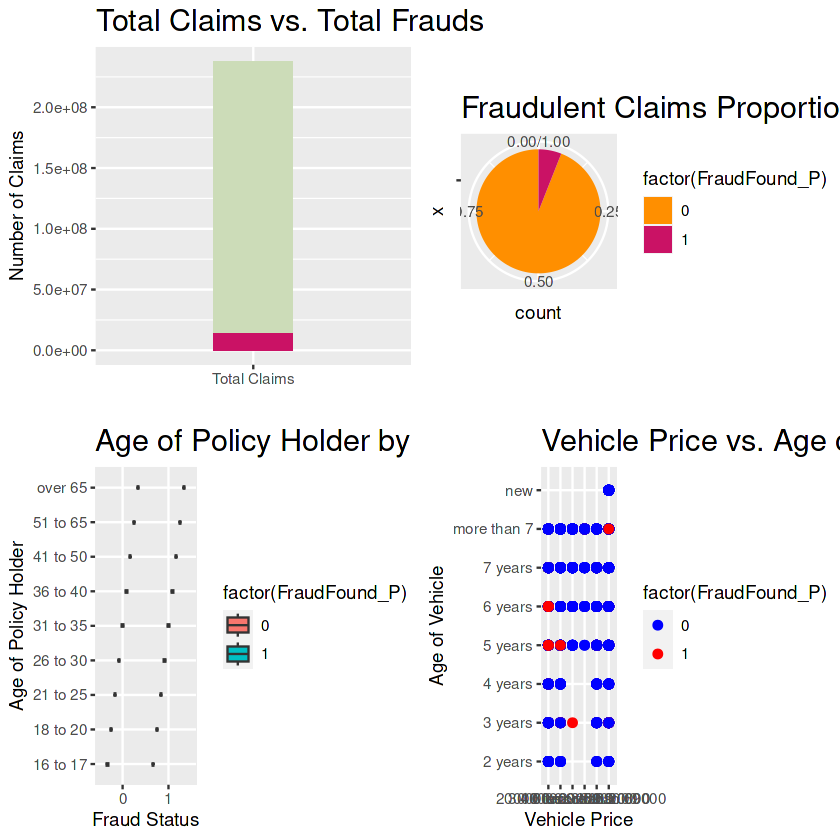

In [12]:
grid.arrange(totalclaims_fraud, fraud_pie, age_dist, vehicle_age, ncol = 2)

The first chart compares the absolute values of total claims and total frauds, while the second chart shows the ratio of fraudulent claims to non-fraudulent claims.

First chart shows the total number of claims filed versus the number of those claims that were identified as fraudulent. It can be seen that a very small portion of total claims were identified as fradulent. 

Third chart is a box plot that shows the distribution of the age of policyholders based on their fraud status.
The x-axis of the plot represents the fraud status of the policyholders and is divided into two categories: fraud and non-fraud. The y-axis represents the age of the policyholders. The boxes in the plot show the interquartile range (IQR) of the age distribution, with the horizontal line inside the box indicating the median age.
It shows that the distribitution age is almost identical with the fradulent status.

Fourth chart shows the relationship between the price of a vehicle and its age, separated by fraud status. The chart shows that there is a higher incidence of fraud for vehicles that are over 5 years old and have a low price.

In [13]:
# Fault vs FraudFound_P
fault_fraud <- ggplot(fraud, aes(x = Fault, fill = factor(FraudFound_P))) +
  geom_bar(position = "dodge") +
  xlab("Fault") +
  ylab("Count") +
  ggtitle("Fault vs FraudFound_P") +
  theme_bw()

# WitnessPresent vs FraudFound_P
witness_fraud <- ggplot(fraud, aes(x = WitnessPresent, fill = factor(FraudFound_P))) +
  geom_bar(position = "dodge") +
  xlab("WitnessPresent") +
  ylab("Count") +
  ggtitle("WitnessPresent vs FraudFound_P") +
  theme_bw()

# PastNumberOfClaims vs FraudFound_P
claims_fraud <- ggplot(fraud, aes(x = PastNumberOfClaims, fill = factor(FraudFound_P))) +
  geom_bar(position = "dodge") +
  xlab("PastNumberOfClaims") +
  ylab("Count") +
  ggtitle("PastNumberOfClaims vs FraudFound_P") +
  theme_bw()

# DriverRating vs FraudFound_P
rating_fraud <- ggplot(fraud, aes(x = DriverRating, fill = factor(FraudFound_P))) +
  geom_bar(position = "dodge") +
  xlab("DriverRating") +
  ylab("Count") +
  ggtitle("DriverRating vs FraudFound_P") +
  theme_bw()

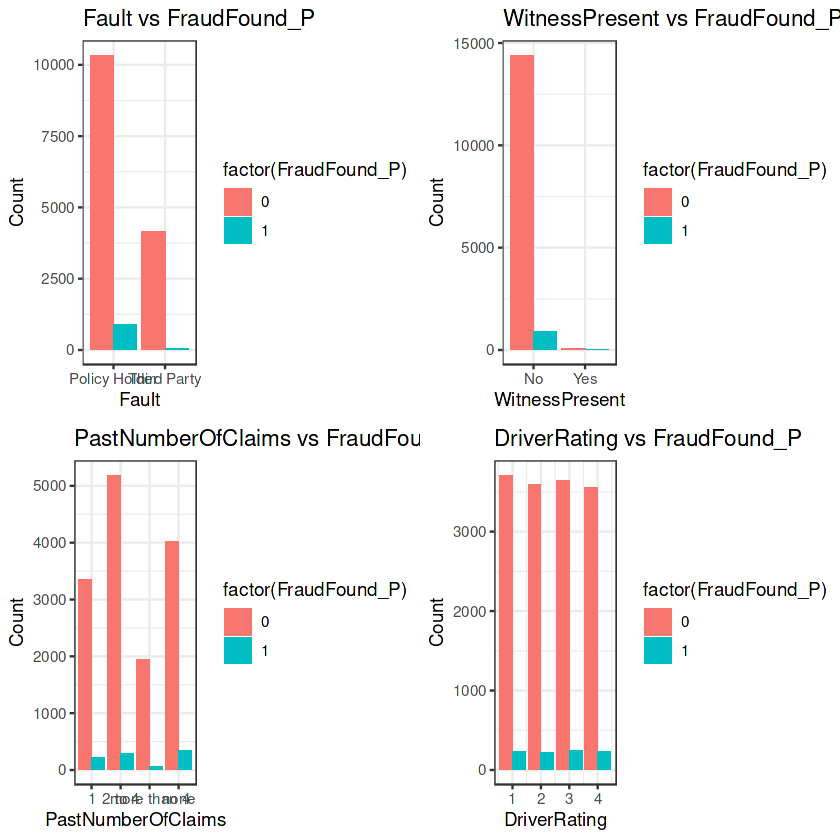

In [14]:
grid.arrange(fault_fraud, witness_fraud, claims_fraud, rating_fraud, ncol = 2)

Charts suggest that the presence of a fault and absence of a witness are positively associated with fraud. However, driver rating and past number of claims do not seem to have a significant effect on the likelihood of fraud.

# Data Preparation

Before converting all dataset into numeric values, let's convert date values manually to their usual values otherwise they will be randomly assigned.

In [15]:
# Convert date values to numeric
fraud <- fraud %>%
  mutate(Month = case_when(
    Month == "Jan" ~ 1,
    Month == "Feb" ~ 2,
    Month == "Mar" ~ 3,
    Month == "Apr" ~ 4,
    Month == "May" ~ 5,
    Month == "Jun" ~ 6,
    Month == "Jul" ~ 7,
    Month == "Aug" ~ 8,
    Month == "Sep" ~ 9,
    Month == "Oct" ~ 10,
    Month == "Nov" ~ 11,
    Month == "Dec" ~ 12
  ),
  DayOfWeek = case_when(
    DayOfWeek == "Monday" ~ 1,
    DayOfWeek == "Tuesday" ~ 2,
    DayOfWeek == "Wednesday" ~ 3,
    DayOfWeek == "Thursday" ~ 4,
    DayOfWeek == "Friday" ~ 5,
    DayOfWeek == "Saturday" ~ 6,
    DayOfWeek == "Sunday" ~ 7
  ),
  DayOfWeekClaimed = case_when(
    DayOfWeekClaimed == "Monday" ~ 1,
    DayOfWeekClaimed == "Tuesday" ~ 2,
    DayOfWeekClaimed == "Wednesday" ~ 3,
    DayOfWeekClaimed == "Thursday" ~ 4,
    DayOfWeekClaimed == "Friday" ~ 5,
    DayOfWeekClaimed == "Saturday" ~ 6,
    DayOfWeekClaimed == "Sunday" ~ 7
  ))

In [81]:
# Create new data frame "nfraud" and convert non-numeric values to numeric
nfraud <- fraud %>%
  mutate_if(is.character, as.factor) %>% # convert character columns to factors
  mutate_all(as.numeric) %>% # convert all columns to numeric
  na.omit() # remove rows with missing values

In [17]:
head(nfraud)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,5,3,7,2,2,6,1,1,3,⋯,2,4,1,1,1,4,1,3,1994,3
2,1,3,3,7,2,1,6,4,2,3,⋯,5,5,2,1,1,4,4,1,1994,2
3,10,5,5,7,2,4,11,2,2,2,⋯,6,7,1,1,1,4,4,1,1994,2
4,6,2,6,18,1,5,7,1,2,2,⋯,7,8,2,1,1,3,4,1,1994,3
5,1,5,1,7,2,2,5,2,1,3,⋯,4,5,1,1,1,4,4,1,1994,2
6,10,4,5,7,2,3,11,1,2,3,⋯,4,3,1,1,1,2,4,1,1994,2


In [18]:
# Create new data frames for each variable
for (col_name in names(fraud)) {
  if (!is.numeric(fraud[[col_name]])) {
    col_unique <- unique(fraud[[col_name]])
    col_df <- data.frame(
      variable = col_unique,
      index = rep(NA, length(col_unique))
    )
    for (i in 1:length(col_unique)) {
      # Get the corresponding index value from nfraud
      index_val <- nfraud[fraud[[col_name]] == col_unique[i], col_name]
      col_df[i, "index"] <- index_val[1]
    }
    colnames(col_df)[1] <- col_name
    assign(col_name, col_df)
  }
}

Here we created a new data frame for each variable and assigned it a name based on the original column name. The new data frame consists of the unique values in the original column and their corresponding index values from nfraud. This allows for easier analysis and visualization of individual variables. Also will make it much easier to identify which number mean what in the original dataset.

An example of that below.

In [19]:
Make

Make,index
<chr>,<dbl>
Honda,7
Toyota,18
Ford,6
Mazda,10
Chevrolet,3
Pontiac,14
Accura,1
Dodge,4
Mercury,12


<h4> Feature Scaling

Here, we will create a few versions of the nfraud dataset which might be helpful for further analysis when we are building the models.

The code creates a normalized, oversampled and encoded versions.

Normalized version ensures that the features are on the same scale, which can improve the performance of some machine learning algorithms.

Oversampling can improve the performance of machine learning algorithms when the classes are imbalanced.

In encoded version each categorical variable is replaced with multiple binary variables indicating the presence or absence of a particular category. 

In [20]:
# Normalize the features
nfraud_norm <- apply(nfraud, 2, function(x) (x - min(x)) / (max(x) - min(x)))

In [83]:
#Handling imbalanced classes:
#install.packages("ROSE")
library("ROSE")

nfraud_oversampled <- ROSE(FraudFound_P ~ ., data = nfraud, seed = 123)$data
head(nfraud_oversampled)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.092930,5.396750,5.893632,13.038525,1.617772,0.3719396,11.01891742,5.489265,2.128101,3.312060,⋯,5.044676,5.495062,0.9376099,1.0298495,1.0599621,4.8630951,3.869462,0.9227791,1995.699,1.6666394
2,4.756541,2.306461,7.159072,2.411599,1.965330,2.3800680,4.98240303,2.960209,1.278349,3.258172,⋯,3.321611,6.025658,1.0730634,0.9957773,0.9497126,3.2070200,3.858101,1.1608848,1993.825,1.9287382
3,9.068795,3.631186,6.877271,5.765311,1.824183,1.8646807,8.69309393,3.495452,1.875208,2.166183,⋯,5.090846,6.624736,0.8625823,0.9921902,1.0255225,4.0622249,3.609155,0.5349923,1993.140,0.7260110
4,10.679763,4.329816,2.645823,7.185092,1.606581,4.2658400,11.47974913,2.250733,1.677214,1.830209,⋯,5.819985,6.257701,0.9681973,1.0477526,1.0750272,2.8281860,2.095724,0.6684106,1996.181,3.6779445
5,4.333110,2.952155,7.184205,12.106592,1.746967,0.9288329,0.05579892,3.318746,1.926640,1.902704,⋯,6.627697,3.559631,1.1848791,0.9032936,0.9612036,0.6247947,3.329967,1.3382260,1994.985,0.1332516
6,6.498200,3.963950,1.132996,17.594977,1.761872,4.2425858,8.37733184,5.074722,1.704839,2.248109,⋯,6.835356,6.251511,0.9246735,1.0266923,0.9876687,0.4562862,4.327578,3.2013697,1993.497,1.8163933


In [22]:
# Handling categorical variables:
library("caret")
fraud_encoded <- predict(dummyVars(FraudFound_P ~ ., data = fraud), newdata = fraud)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




We'll use the nfraud_oversampled data frame since total claims and total frads are imbalanced. Fraud class is significantly underrepresented in the dataset compared to the other class(es). By oversampling the minority class, we are essentially creating more instances of the fraud class in the dataset.

# Correlations

In [24]:
# Create correlation matrix
cm_fraud_os <- cor(nfraud_oversampled)

In [25]:
library("reshape2")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




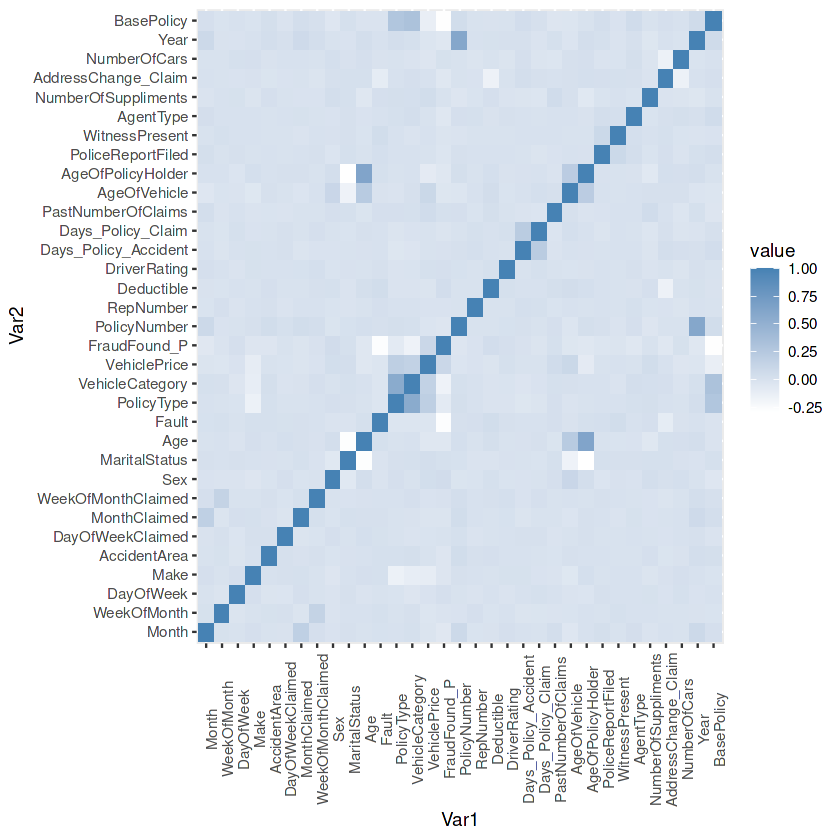

In [26]:
# Plot a heatmap of the correlation matrix
ggplot(data = melt(cm_fraud_os), aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient(low = "white", high = "steelblue") + 
  theme(axis.text.x = element_text(angle = 90))

In [27]:
ncol(cm_fraud_os)
colnames(cm_fraud_os)

[1] 33

[1] "Month"                "WeekOfMonth"          "DayOfWeek"           
 [4] "Make"                 "AccidentArea"         "DayOfWeekClaimed"    
 [7] "MonthClaimed"         "WeekOfMonthClaimed"   "Sex"                 
[10] "MaritalStatus"        "Age"                  "Fault"               
[13] "PolicyType"           "VehicleCategory"      "VehiclePrice"        
[16] "FraudFound_P"         "PolicyNumber"         "RepNumber"           
[19] "Deductible"           "DriverRating"         "Days_Policy_Accident"
[22] "Days_Policy_Claim"    "PastNumberOfClaims"   "AgeOfVehicle"        
[25] "AgeOfPolicyHolder"    "PoliceReportFiled"    "WitnessPresent"      
[28] "AgentType"            "NumberOfSuppliments"  "AddressChange_Claim" 
[31] "NumberOfCars"         "Year"                 "BasePolicy"

In [28]:
library("corrplot")

corrplot 0.92 loaded



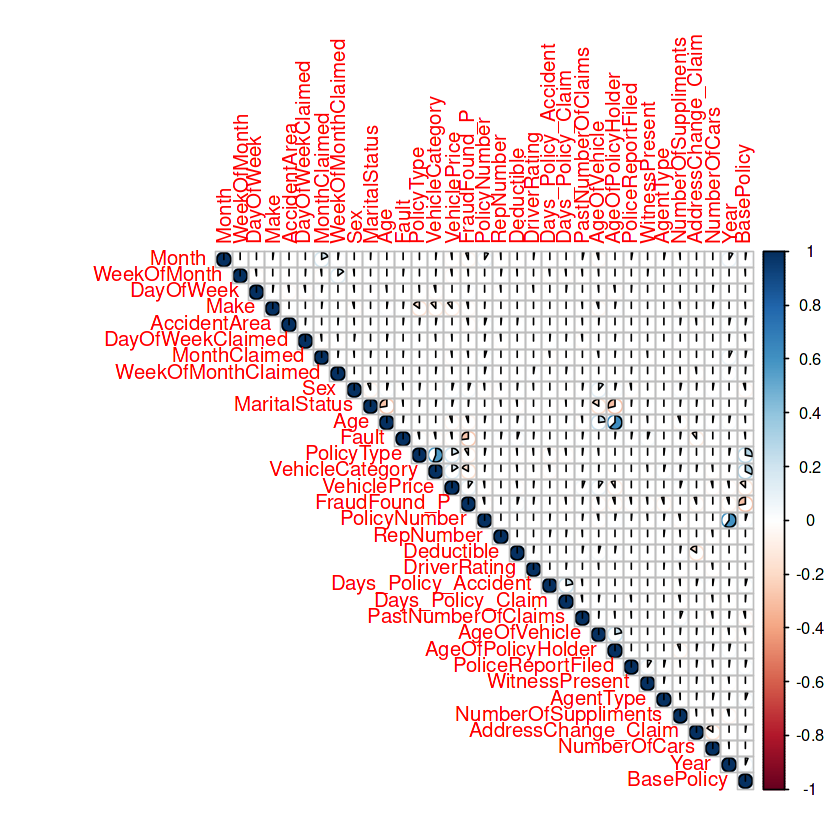

In [29]:
corrplot(cm_fraud_os, type = "upper" ,method = "pie")
#  'arg' should be one of “circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”

# Model Evaluation and Comparison

In this section, we will be evaluating our models using two algorithms: Random Forest and XGBoost.

We'll start by partitioning the dataset into training and testing datasets based on the response variable FraudFound_P into 70% training and 30% testing data.

We then train a random forest model using the train function from the caret package. We set the method parameter to "rf", which specifies that we want to use the random forest algorithm for training. We also use the trainControl function to specify the number of folds for cross-validation. The output of the train function is a trained model object, which we store in the rf_model variable.

Similarly, we train an XGBoost model using the train function. We specify the method parameter as "xgbTree" to indicate that we want to use the XGBoost algorithm.

Finally, we convert the FraudFound_P variable to a factor variable in both training and testing datasets using the factor function from the mlr3 package. We also specify the levels parameter in the factor function to ensure that the levels in the testing dataset match those in the training dataset.

In [84]:
#Model evaluation
set.seed(123)
trainIndex <- caret::createDataPartition(nfraud_oversampled$FraudFound_P, p = 0.7, list = FALSE)
train <- nfraud_oversampled[trainIndex,]
test <- nfraud_oversampled[-trainIndex,]

In [85]:
train$FraudFound_P <- as.factor(train$FraudFound_P)
test$FraudFound_P <- as.factor(test$FraudFound_P)

In [32]:
library("randomForest")
library("xgboost")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [33]:
# Look at session information and increase the memory usage
#gc()
#sessionInfo()

#library(usethis) 
#usethis::edit_r_environ() # R_MAX_VSIZE=3Gb 

In [34]:
# Train a random forest model
rf_model <- train(FraudFound_P ~ ., data = train, method = "rf", trControl = trainControl(method = "cv", number = 5))

In [35]:
# Train an XGBoost model
xgb_model <- train(FraudFound_P ~ ., data = train, method = "xgbTree", trControl = trainControl(method = "cv", number = 5))

[17:21:49] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:49] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:50] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:50] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:50] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:50] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:51] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:51] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:52] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[17:21:52] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [63]:
library(mlr)

In [37]:
train$FraudFound_P <- factor(train$FraudFound_P)
test$FraudFound_P <- factor(test$FraudFound_P, levels = levels(train$FraudFound_P))

We are using the trained random forest and XGBoost models to make predictions on the test dataset. We first use the random forest model to predict the fraud probabilities for each observation in the test dataset.

Next, we evaluate the performance of both models using confusion matrices. Then calculate the evaluation metrics including accuracy, precision, recall, and F1 score.

Then, we generate a ROC curve and calculate the AUC score to evaluate the XGBoost model's performance. 

We then extract the confusion matrix values for the XGBoost model and compute the evaluation metrics using the formulae for accuracy, precision, recall, and F1 score. Finally, we print the evaluation metrics for the XGBoost model and create a bar chart of the metrics using the ggplot2 package.


In [38]:
# Predict on test set
rf_pred <- as.numeric(predict(rf_model, newdata = test))  # returns a numerical vector
#rf_pred <- predict(rf_model, newdata = test) # returns a numerical vector

rf_pred_binary <- ifelse(rf_pred > 0.5, "1", "0") # convert to binary factor with 2 levels
rf_pred_factor <- factor(rf_pred_binary, levels = levels(test$FraudFound_P))


xgb_pred <- predict(xgb_model, newdata = test)

In [39]:
# Evaluate performance
rf_perf <- confusionMatrix(rf_pred_factor, test$FraudFound_P)
xgb_perf <- confusionMatrix(xgb_pred, test$FraudFound_P)

In [40]:
# Print metrics
rf_perf$overall

xgb_perf$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.4916757      0.0000000      0.4771687      0.5061932      0.5083243 
AccuracyPValue  McnemarPValue 
     0.9886757      0.0000000

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.562162e-01   7.126693e-01   8.457713e-01   8.662091e-01   5.083243e-01 
AccuracyPValue  McnemarPValue 
  0.000000e+00   3.762567e-09

In [41]:
library("pROC")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



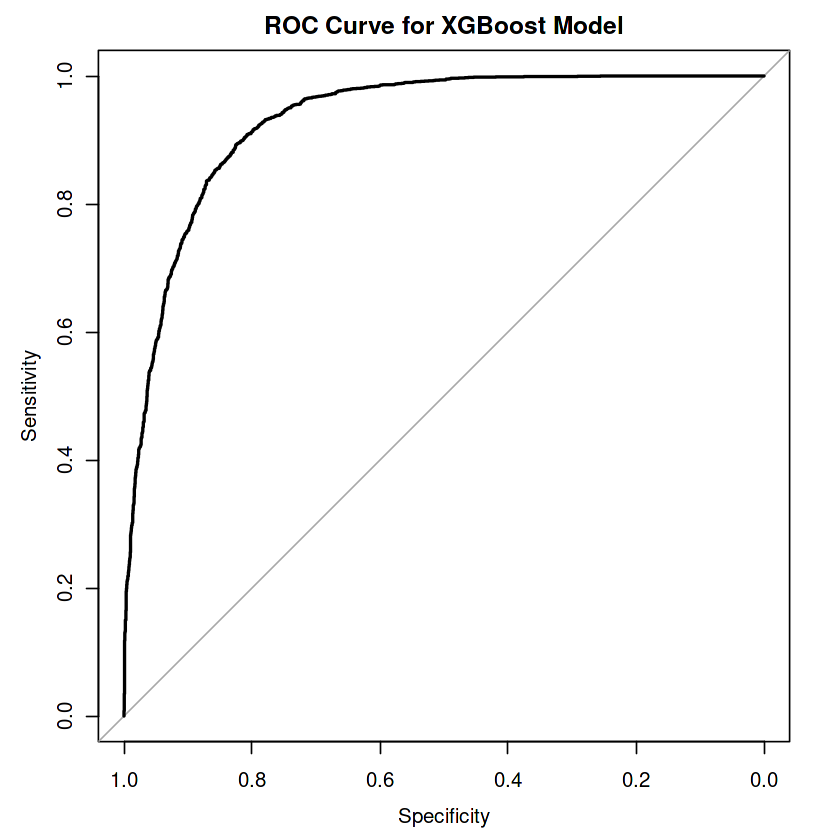

In [42]:
# Generate ROC curve for XGBoost model
xgb_roc <- roc(test$FraudFound_P, predict(xgb_model, newdata = test, type = "prob")[,2])
plot(xgb_roc, main = "ROC Curve for XGBoost Model")

In [43]:
auc(xgb_roc)

Area under the curve: 0.9303

The AUC score of 0.930254608248815 is quite high, indicating that the classifier is very good at distinguishing between positive and negative examples.

In [44]:
# Extract confusion matrix values
tn <- xgb_perf$table[1,1]
fp <- xgb_perf$table[1,2]
fn <- xgb_perf$table[2,1]
tp <- xgb_perf$table[2,2]

# Calculate evaluation metrics
accuracy <- (tp + tn) / (tp + tn + fp + fn)
precision <- tp / (tp + fp)
recall <- tp / (tp + fn)
f1_score <- 2 * precision * recall / (precision + recall)

In [45]:
# Print the results
cat("Accuracy of xgb_model:", round(accuracy, 5), "\n")
cat("Precision of xgb_model:", round(precision, 5), "\n")
cat("Recall of xgb_model:", round(recall, 5), "\n")
cat("F1 Score of xgb_model:", round(f1_score, 5), "\n")

Accuracy of xgb_model: 0.85622 
Precision of xgb_model: 0.88742 
Recall of xgb_model: 0.83148 
F1 Score of xgb_model: 0.85854 


In [46]:
# Create confusion matrix for the random forest model
rf_cm <- table(rf_pred_factor, test$FraudFound_P)

# Calculate evaluation metrics
rf_accuracy <- sum(diag(rf_cm))/sum(rf_cm)   # Calculate accuracy as sum of diagonal elements divided by sum of all elements
rf_precision <- rf_cm[2,2]/sum(rf_cm[,2])    # Calculate precision as true positives divided by sum of predicted positives
rf_recall <- rf_cm[2,2]/sum(rf_cm[2,])       # Calculate recall as true positives divided by sum of actual positives
rf_f1score <- 2*rf_precision*rf_recall/(rf_precision+rf_recall)   # Calculate F1-score as harmonic mean of precision and recall

In [47]:
# Print metrics
cat("Random Forest Model Evaluation Metrics:\n")
cat(paste("Accuracy:", rf_accuracy, "\n"))     # Print accuracy
cat(paste("Precision:", rf_precision, "\n"))   # Print precision
cat(paste("Recall:", rf_recall, "\n"))         # Print recall
cat(paste("F1 Score:", rf_f1score, "\n"))      # Print F1-score

Random Forest Model Evaluation Metrics:
Accuracy: 0.491675675675676 
Precision: 1 
Recall: 0.491675675675676 
F1 Score: 0.659225974778953 


After comparing the scores of two models random forest and xgboost, it is clear that xgboost has a better performance. So let's continue with the XGboost model.

# Hyperparameter Tuning

We'll use DiceKriging, mlr3tuning, and rgenoud libraries to perform hyperparameter tuning for an XGBoost classifier. The objective is to maximize the area under the receiver operating characteristic curve (AUC) for the binary classification of vehicle insurance claims as fraudulent or not fraudulent.

The objective_function is defined to take in the training and test data, as well as a set of hyperparameters, and returns the AUC value and the set of hyperparameters used. The xgboost function from the xgboost library is used to train the model with the specified hyperparameters and make predictions on the test data. The performance function from the mlr library is used to compute the AUC value for the predictions.

In [65]:
library("DiceKriging")
library("rgenoud")

In [76]:
# Define the objective function to optimize (AUC)
objective_function <- function(data, param) {
  set.seed(123)
  xgb <- xgboost(
    data = data$train, 
    label = data$train$FraudFound_P,
    booster = "gbtree", 
    objective = "binary:logistic",
    eval_metric = "auc",
    nrounds = param$nrounds, 
    eta = param$eta, 
    max_depth = param$max_depth,
    subsample = param$subsample,
    colsample_bytree = param$colsample_bytree
  )

  pred <- predict(xgb, data$test)
  auc <- performance(prediction(pred, data$test$FraudFound_P), "auc")@y.values[[1]]
  
  return(list("measure" = auc, "params" = param))
}

In [94]:
# Define the parameter search space
params <- makeParamSet(
  makeIntegerParam("nrounds", lower = 1, upper = 100),
  makeNumericParam("eta", lower = 0.001, upper = 0.5),
  makeIntegerParam("max_depth", lower = 1, upper = 10),
  makeNumericParam("subsample", lower = 0.5, upper = 1),
  makeNumericParam("colsample_bytree", lower = 0.5, upper = 1)
)

In [95]:
# Define the tuning control
ctrl <- makeTuneControlMBO()

learner <- makeLearner("classif.xgboost", predict.type = "prob")

# Create an AUC measure object
auc <- mlr::auc

In [96]:
# Tune the hyperparameters using Bayesian optimization
tuned_params <- tuneParams(
  learner = learner,
  task = makeClassifTask(data = train, target = "FraudFound_P"),
  resampling = makeResampleDesc("CV", iters = 3),
  par.set = params,
  control = ctrl,
  show.info = TRUE,
  measures = list(auc)
)

[Tune] Started tuning learner classif.xgboost for parameter set:

                    Type len Def       Constr Req Tunable Trafo
nrounds          integer   -   -     1 to 100   -    TRUE     -
eta              numeric   -   - 0.001 to 0.5   -    TRUE     -
max_depth        integer   -   -      1 to 10   -    TRUE     -
subsample        numeric   -   -     0.5 to 1   -    TRUE     -
colsample_bytree numeric   -   -     0.5 to 1   -    TRUE     -

With control class: TuneControlMBO

Imputation value: -0

[Tune-x] 1: nrounds=53; eta=0.229; max_depth=6; subsample=0.756; colsample_bytree=0.722

[Tune-y] 1: auc.test.mean=0.9165868; time: 0.1 min

[Tune-x] 2: nrounds=42; eta=0.169; max_depth=7; subsample=0.713; colsample_bytree=0.632

[Tune-y] 2: auc.test.mean=0.9150875; time: 0.0 min

[Tune-x] 3: nrounds=83; eta=0.348; max_depth=7; subsample=0.74; colsample_bytree=0.845

[Tune-y] 3: auc.test.mean=0.9107394; time: 0.1 min

[Tune-x] 4: nrounds=59; eta=0.29; max_depth=5; subsample=0.837; colsa

In [97]:
tuned_params

Tune result:
Op. pars: nrounds=77; eta=0.212; max_depth=5; subsample=0.8; colsample_bytree=0.552
auc.test.mean=0.9200900

These parameters were found to produce the best results on the training dataset. 

# Feature Importance

Finally, after optimizing the XGBoost model let's have a look at which variables are more important when deciding weather an insurance claim ist fradulent or not.

We'll use the hyperparameters for the model that are set to optimal values obtained through hyperparameter tuning. Then plot the features based on their importance values.

In [99]:
train$FraudFound_P <- as.numeric(train$FraudFound_P)

In [101]:
train$FraudFound_P[train$FraudFound_P == 1] <- 0
train$FraudFound_P[train$FraudFound_P == 2] <- 1

In [102]:
str(train$FraudFound_P)

 num [1:10794] 0 0 0 0 0 0 0 0 0 0 ...


In [104]:
unique(train$FraudFound_P)

[1] 0 1

In [105]:
# Train an XGBoost model with the optimal hyperparameters
xgb_modelv3 <- xgboost(
  data = as.matrix(train[, -which(names(train) == "FraudFound_P")]), # exclude target variable
  label = train$FraudFound_P,
  nrounds = 77,
  eta = 0.212,
  max_depth = 5,
  subsample = 0.8,
  colsample_bytree = 0.552,
  objective = "binary:logistic"
)

[1]	train-logloss:0.668073 
[2]	train-logloss:0.631255 
[3]	train-logloss:0.563420 
[4]	train-logloss:0.545773 
[5]	train-logloss:0.502752 
[6]	train-logloss:0.469931 
[7]	train-logloss:0.447181 
[8]	train-logloss:0.431426 
[9]	train-logloss:0.417294 
[10]	train-logloss:0.403758 
[11]	train-logloss:0.394532 
[12]	train-logloss:0.387474 
[13]	train-logloss:0.381819 
[14]	train-logloss:0.377047 
[15]	train-logloss:0.366323 
[16]	train-logloss:0.359170 
[17]	train-logloss:0.353251 
[18]	train-logloss:0.348377 
[19]	train-logloss:0.343947 
[20]	train-logloss:0.340105 
[21]	train-logloss:0.334971 
[22]	train-logloss:0.329750 
[23]	train-logloss:0.325406 
[24]	train-logloss:0.320790 
[25]	train-logloss:0.317997 
[26]	train-logloss:0.315134 
[27]	train-logloss:0.311682 
[28]	train-logloss:0.307527 
[29]	train-logloss:0.305006 
[30]	train-logloss:0.302665 
[31]	train-logloss:0.299712 
[32]	train-logloss:0.297241 
[33]	train-logloss:0.293898 
[34]	train-logloss:0.291490 
[35]	train-logloss:0.28

In [106]:
summary(xgb_modelv3)

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            185909 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               18 -none-             call       
params              6 -none-             list       
callbacks           2 -none-             list       
feature_names      32 -none-             character  
nfeatures           1 -none-             numeric    

In [110]:
# Show variable importance and plot
importance_matrix <- xgb.importance(names(train[, -1]), model = xgb_modelv3)
summary(importance_matrix)

   Feature               Gain              Cover            Frequency      
 Length:32          Min.   :0.006484   Min.   :0.004902   Min.   :0.01745  
 Class :character   1st Qu.:0.008421   1st Qu.:0.012069   1st Qu.:0.02380  
 Mode  :character   Median :0.011529   Median :0.018159   Median :0.02723  
                    Mean   :0.031250   Mean   :0.031250   Mean   :0.03125  
                    3rd Qu.:0.022658   3rd Qu.:0.034590   3rd Qu.:0.03543  
                    Max.   :0.290167   Max.   :0.127504   Max.   :0.06029  

In [111]:
str(importance_matrix)

Classes ‘data.table’ and 'data.frame':	32 obs. of  4 variables:
 $ Feature  : chr  "PolicyType" "BasePolicy" "AgentType" "AddressChange_Claim" ...
 $ Gain     : num  0.2902 0.1111 0.1084 0.086 0.0567 ...
 $ Cover    : num  0.1275 0.0547 0.0938 0.0748 0.0775 ...
 $ Frequency: num  0.0603 0.0423 0.0571 0.0561 0.0481 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [112]:
head(importance_matrix)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
PolicyType,0.29016690,0.12750380,0.06028556
BasePolicy,0.11112148,0.05470373,0.04230566
AgentType,0.10840976,0.09378226,0.05711264
AddressChange_Claim,0.08598652,0.07481223,0.05605500
Days_Policy_Claim,0.05669639,0.07752315,0.04812269
VehicleCategory,0.02937227,0.05625699,0.03860391


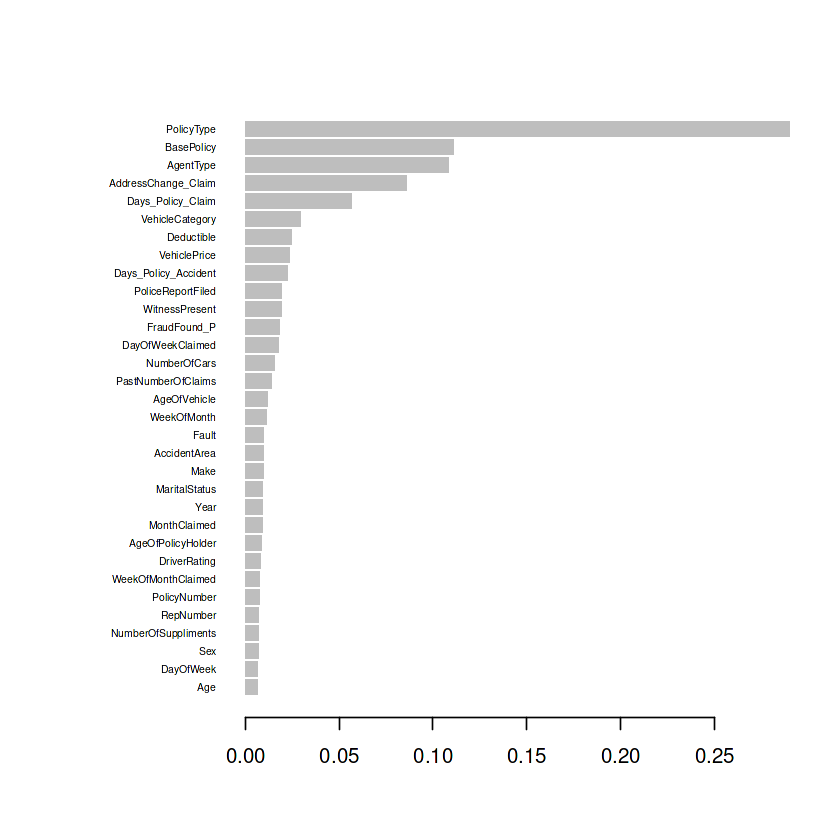

In [113]:
xgb.plot.importance(importance_matrix)

Looking at the chart, we can see that the most important feature for our model is the PolicyType, which is significantly higher than the score for the next most important feature, AgentType.

The third and fourth most important features are BasePolicy and AddressChange_Claim, respectively. Followed by, the fifth most important feature is Days_Policy_Claim.